#### Домашнее задание к занятию "Оценка точности модели, переобучение, регуляризация"

Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
# data.info()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
X = data[data.columns[:-1]]
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']
Y[:5]

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int64

In [7]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70/30

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [9]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [10]:
predictions = model.predict_proba(X_test)
predictions[:5]

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037],
       [0.70926586, 0.29073414],
       [0.77284695, 0.22715305]])

In [11]:
model.score(X_test, Y_test)

0.7319371727748691

**1. Посчитаем параметры FPR и TPR для ROC-кривой с помощью штатных стредств**

Импортируем ROC-кривую (Receiver Operating Characteristic)

In [12]:
from sklearn.metrics import roc_curve

Получаем значения false positive rate и true positive rate для различных значений порога

In [13]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [14]:
for line in zip(fpr, tpr, thres):
    print(line)

(0.0, 0.0, 1.9292091232671758)
(0.0, 0.0016474464579901153, 0.9292091232671756)
(0.0, 0.008237232289950576, 0.89998862795351)
(0.0007674597083653108, 0.008237232289950576, 0.8977304698527878)
(0.0007674597083653108, 0.019769357495881382, 0.8650840097292727)
(0.0030698388334612432, 0.019769357495881382, 0.8547129971134584)
(0.0030698388334612432, 0.023064250411861616, 0.8544826965581638)
(0.003837298541826554, 0.023064250411861616, 0.8521926884372871)
(0.003837298541826554, 0.03130148270181219, 0.8338303480746599)
(0.004604758250191865, 0.03130148270181219, 0.8336073228587285)
(0.004604758250191865, 0.03789126853377265, 0.8248957641619414)
(0.005372217958557176, 0.03789126853377265, 0.8231501847295927)
(0.005372217958557176, 0.04118616144975288, 0.8191949388049448)
(0.0061396776669224865, 0.04118616144975288, 0.8186308246896968)
(0.0061396776669224865, 0.04942339373970346, 0.8087952639694657)
(0.006907137375287797, 0.04942339373970346, 0.8081343487332543)
(0.006907137375287797, 0.057660

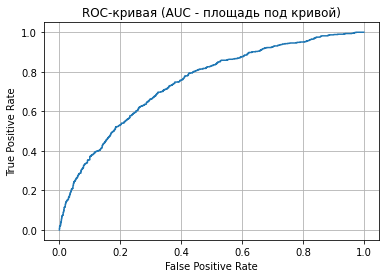

In [15]:
plt.plot(fpr, tpr)
plt.title('ROC-кривая (AUC - площадь под кривой)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()

**2. Посчитаем параметры FPR и TPR вручную**

In [16]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [17]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [18]:
sum([226, 131, 381, 1172])

1910

In [19]:
fpr_ = fp / (fp + tn)
tpr_ = tp / (tp + fn)
fpr_, tpr_

(0.10053722179585571, 0.3723228995057661)

Можно заметить, что полученные вручную результаты fpr_ и tpr_ совпадают со штатно рассчитанными fpr и tpr при пороге 0.5.  
Ручной расчет с другими значениями порогов также дал результаты, совпадающие со полученными в штатном roc_curve.